In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# PLOTLY DataFrame

# File to Load
file_to_load = "../nba_totals.csv"

# Read .csv File and store into Pandas data frame
totals_df = pd.read_csv(file_to_load)
pd.set_option('display.max_columns', None)
totals_df
# # Convert to json
# totals_df.to_json(r'nba_stats.json')

# totals_df['PPG'] = round(totals_df.PTS / totals_df.GP,1)

# totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())

totals_df = totals_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})
totals_df

totals_df = totals_df[totals_df.SALARY != '-']
totals_df

# Convert to json
totals_df.to_json(r'data/nba.json',orient='records')

# pd.set_option('display.max_columns', None)
# totals_df

In [3]:
scoring_df = totals_df[['ERA','SEASON','PLAYER','GP','FGM','FG%','T_3PM','T_3P%','FTM','FT%']]
scoring_df['FG-3P-FT PTS'] = ((scoring_df.FGM*2)+(scoring_df.T_3PM *3)+(scoring_df.FTM*1))
# scoring_df['FG_PTS']
# scoring_df = scoring_df[scoring_df['GP'] > 60]
scoring_df

# conditional filter example dataframe['column_name']== value


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ERA,SEASON,PLAYER,GP,FGM,FG%,T_3PM,T_3P%,FTM,FT%,FG-3P-FT PTS
0,1985-89,1984-85,Michael Jordan,82,837,51.5,9,17.3,630,84.5,2331
1,1985-89,1984-85,Larry Bird,80,918,52.2,56,42.7,403,88.2,2407
2,1985-89,1984-85,Alex English,81,939,51.8,1,20.0,383,82.9,2264
3,1985-89,1984-85,Dominique Wilkins,81,853,45.1,25,30.9,486,80.6,2267
4,1985-89,1984-85,Purvis Short,78,819,46.0,47,31.3,501,81.7,2280
...,...,...,...,...,...,...,...,...,...,...,...
15544,2020,2019-20,Quinndary Weatherspoon,3,0,0.0,0,0.0,0,0.0,0
15545,2020,2019-20,Stanton Kidd,4,0,0.0,0,0.0,0,0.0,0
15546,2020,2019-20,Talen Horton-Tucker,2,0,0.0,0,0.0,0,0.0,0
15547,2020,2019-20,Vic Law,5,0,0.0,0,0.0,0,0.0,0


In [4]:
# Filter by Season
season_df = scoring_df.loc[scoring_df['SEASON'] == '1990-91']
season_df

,ERA,SEASON,PLAYER,GP,FGM,FG%,T_3PM,T_3P%,FTM,FT%,FG-3P-FT PTS
2024,1990-94,1990-91,Michael Jordan,82,990,53.9,29,31.2,571,85.1,2638
2025,1990-94,1990-91,Karl Malone,82,847,52.7,4,28.6,684,77.0,2390
2026,1990-94,1990-91,Patrick Ewing,81,845,51.4,0,0.0,464,74.5,2154
2027,1990-94,1990-91,Chris Mullin,82,777,53.6,40,30.1,513,88.4,2187
2028,1990-94,1990-91,David Robinson,82,754,55.2,1,14.3,592,76.2,2103
...,...,...,...,...,...,...,...,...,...,...,...
2405,1990-94,1990-91,Robert Reid,3,2,14.3,0,0.0,0,0.0,4
2406,1990-94,1990-91,Bart Kofoed,5,0,0.0,0,0.0,3,50.0,3
2407,1990-94,1990-91,Gary Leonard,4,0,0.0,0,0.0,2,50.0,2
2408,1990-94,1990-91,Jim Thomas,3,1,25.0,0,0.0,0,0.0,2


In [5]:
# Select Top and Bottom PTS scored per game
top = season_df.nlargest(50,'PTS', keep='all')
top
bottom = season_df.nsmallest(50,'PTS')
bottom
​
frames = [top,bottom]
top_bottom_df = pd.concat(frames)
top_bottom_df
​
# top_bottom= [(season_df.nlargest(50,'PTS',keep='all')) | (season_df.nsmallest(50,'PTS'))]
# NOT WORKING WHEN COMBINED WITH OR STATEMENT
​
# df.nlargest(#, 'column_name',keep ='all')
#     keep = 'all' keeps duplicate values
    
#  df[(df.column_name >= 200) | (df.column_name == 'Value')]
#     | = OR

SyntaxError: invalid character in identifier (<ipython-input-5-b4c48ef94592>, line 6)

In [6]:
# # conditional filter example: dataframe['column_name']== value

# # totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# # df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())



In [48]:
# File to Load
file_to_load = "nba_totals.csv"

# Read .csv File and store into Pandas data frame
nba_df = pd.read_csv(file_to_load)
# nba_df

nba_df = nba_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})
# nba_df

# Filter by Season
mj_df = nba_df.loc[nba_df['PLAYER'] == 'Michael Jordan']
mj_df

# league = nba_df[(nba_df.GP >=58)]
# league

# LEADER MINIMUMS
# SCORING:	Player must play 70% of his team's games (58 in 82-game season)*
# REBOUNDS:	Player must play 70% of his team's games (58 in 82-game season)*
# FIELD GOAL %:	300 field goals made
# FREE THROW %:	125 free throws made
# 3PT %:	82 three-point field goals made
# ASSISTS:	Player must play 70% of his team's games (58 in 82-game season)*
# STEALS:	Player must play 70% of his team's games (58 in 82-game season)*
# BLOCKED SHOTS:	Player must play 70% of his team's games (58 in 82-game season)*
# MINUTES:	Player must play 70% of his team's games (58 in 82-game season)*
# AST/TO RATIO:	200 assists
# STL/TO RATIO:	82 steals

# leaders = nba_df[(nba_df.GP >=58) & (nba_df.FGM >=300) & (nba_df.FTM >= 125) & (nba_df.T_3PM >= 82) & 
#                  (nba_df.AST >= 200) & (nba_df.STL >=82)]
# leaders

# # At Least 25% above leader minimums
# best = nba_df[(nba_df.GP >=58) & (nba_df.FGM >=375) & (nba_df.FTM >= 157) & (nba_df.T_3PM >= 103) & 
#                  (nba_df.AST >= 250) & (nba_df.STL >=103)]
# best

# movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

# leaders_df

# idx = np.where((df['Salary_in_1000']>=100) &amp; (df['Age']&lt; 60) &amp; (df['FT

# 

# # conditional filter example dataframe['column_name']== value

# # totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# # df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())

# totals_df = totals_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})

# totals_df

,SEASON,ERA,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV
0,1984-85,1985-89,1,Michael Jordan,82,3144,2313,837,1625,51.5,...,367,534,481,196,69,291,285,2398,1.65,0.67
495,1985-86,1985-89,191,Michael Jordan,18,451,408,150,328,45.7,...,41,64,53,37,21,45,46,340,1.18,0.82
623,1986-87,1985-89,1,Michael Jordan,82,3281,3041,1098,2279,48.2,...,264,430,377,236,125,272,237,2617,1.39,0.87
958,1987-88,1985-89,1,Michael Jordan,82,3311,2868,1069,1998,53.5,...,310,449,485,259,131,252,270,2874,1.93,1.03
1290,1988-89,1985-89,1,Michael Jordan,81,3255,2633,966,1795,53.8,...,503,652,650,234,65,290,247,2996,2.24,0.81
1643,1989-90,1990-94,1,Michael Jordan,82,3197,2753,1034,1964,52.6,...,422,565,519,227,54,247,241,2835,2.10,0.92
2024,1990-91,1990-94,1,Michael Jordan,82,3034,2580,990,1837,53.9,...,374,492,453,223,83,202,229,2682,2.24,1.10
2410,1991-92,1990-94,1,Michael Jordan,80,3102,2404,943,1818,51.9,...,420,511,489,182,75,200,201,2487,2.45,0.91
2795,1992-93,1990-94,1,Michael Jordan,78,3067,2541,992,2003,49.5,...,387,522,428,221,61,207,188,2462,2.07,1.07
3777,1994-95,1995-99,192,Michael Jordan,17,668,457,166,404,41.1,...,92,117,90,30,13,35,47,407,2.57,0.86


In [46]:
# Correlation of Defensive Rebounds (DREB), Field Goals Made (FGM) & Assists (AST)
league_avg=round(league.groupby('SEASON').mean())
league_avg= league_avg.reset_index()



# # player avg per season
# player_avg = round(league.groupby('PLAYER').mean())
# player_avg

# mvps= ['']

# leader_avg = round(leaders.groupby('SEASON').mean())
# leader_avg= leader_avg.reset_index()

# best_avg = round(best.groupby('SEASON').mean())
# best_avg= best_avg.reset_index()
# best_avg
# # Filter by Season
# season_avg = avg.loc[avg['SEASON'] == '1990-91']
# season_avg
# Filter by Season
# season_df = scoring_df.loc[scoring_df['SEASON'] == '1990-91']

,#,GP,MIN,PTS,FGM,FGA,FG%,T_3PM,T_3PA,T_3P%,...,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV
PLAYER,,,,,,,,,,,,,,,,,,,,,
A.C. Green,124.0,82.0,2375.0,806.0,296.0,596.0,49.0,8.0,32.0,17.0,...,398.0,616.0,92.0,67.0,36.0,94.0,158.0,1148.0,1.0,1.0
A.J. English,131.0,76.0,1554.0,751.0,308.0,709.0,44.0,4.0,32.0,14.0,...,88.0,158.0,160.0,28.0,12.0,102.0,144.0,570.0,2.0,0.0
Aaron Brooks,146.0,73.0,1664.0,792.0,285.0,695.0,41.0,103.0,278.0,37.0,...,101.0,132.0,243.0,44.0,10.0,125.0,147.0,664.0,2.0,0.0
Aaron Gordon,83.0,70.0,2123.0,968.0,365.0,816.0,45.0,85.0,265.0,31.0,...,359.0,477.0,184.0,58.0,46.0,104.0,145.0,1113.0,2.0,1.0
Aaron Gray,275.0,61.0,613.0,262.0,103.0,204.0,50.0,0.0,1.0,0.0,...,98.0,168.0,41.0,21.0,16.0,57.0,117.0,307.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zan Tabak,184.0,67.0,1332.0,514.0,225.0,414.0,54.0,0.0,1.0,0.0,...,203.0,320.0,62.0,24.0,31.0,101.0,204.0,611.0,1.0,0.0
Zarko Cabarkapa,296.0,61.0,505.0,199.0,67.0,174.0,38.0,5.0,20.0,25.0,...,74.0,111.0,20.0,13.0,7.0,35.0,87.0,184.0,1.0,0.0
Zaza Pachulia,215.0,71.0,1413.0,479.0,168.0,355.0,47.0,0.0,2.0,0.0,...,254.0,403.0,87.0,49.0,25.0,92.0,178.0,715.0,1.0,1.0


# Seaborn

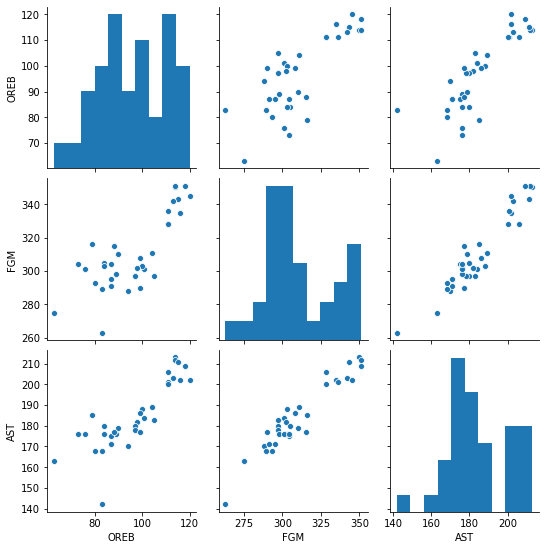

In [36]:
sns.pairplot(league_avg[["OREB", "FGM", "AST"]])
plt.show()

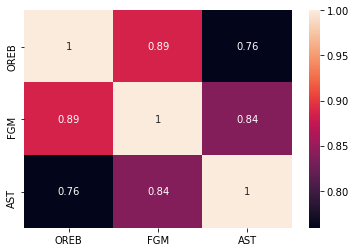

In [51]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = mj_df[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

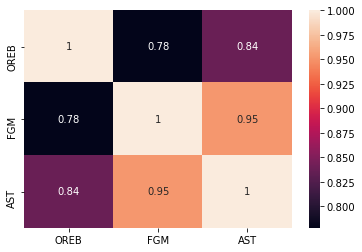

In [37]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = leauavg[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

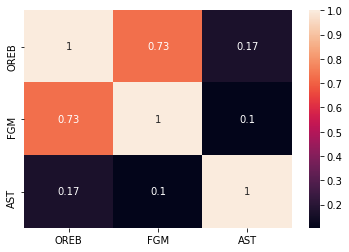

In [38]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = leader_avg[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

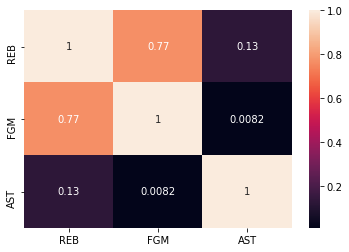

In [42]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = best_avg[["REB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

In [ ]:
# # Convert to json
# totals_df.to_json(r'nba_stats.json')